<a href="https://colab.research.google.com/github/Minhhhh29/AI_1/blob/main/BTVN2_AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
import cv2
import numpy as np
import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import kagglehub
import matplotlib.pyplot as plt

# Tải dataset từ KaggleHub
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

# Giải nén file ZIP nếu có
for file in os.listdir(path):
    if file.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(path, file), 'r') as zip_ref:
            zip_ref.extractall(path)
        print(f"Đã giải nén: {file}")
    else:
        print(f"Không có tệp ZIP hoặc tệp đã được giải nén trước đó.")

# Tìm thư mục chứa các thư mục con của ảnh (daisy/, rose/, tulip,...)
def find_data_folder(base_path):
    print("Danh sách thư mục và tệp trong dataset:", os.listdir(base_path))

    for root, dirs, files in os.walk(base_path):
        print("Đang kiểm tra thư mục:", root)  # In ra đường dẫn thư mục
        if any(os.path.isdir(os.path.join(root, d)) for d in dirs):
            return root
    return None

data_dir = find_data_folder(path)
print("Thư mục chứa ảnh:", data_dir)

# Kiểm tra nếu không có thư mục chứa ảnh
if data_dir is None:
    print("Không tìm thấy thư mục chứa ảnh. Kiểm tra lại dữ liệu hoặc cấu trúc thư mục.")
    exit()

# Kiểm tra xem thư mục 'flowers' có chứa các ảnh trực tiếp hay không
flowers_dir = os.path.join(data_dir, "flowers")
print("Danh sách tệp và thư mục trong 'flowers':", os.listdir(flowers_dir))

# Kích thước ảnh đầu vào
img_size = 100
X = []
y = []

# Đọc ảnh từ các thư mục con (label = tên thư mục)
for label in os.listdir(flowers_dir):
    folder_path = os.path.join(flowers_dir, label)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue
                img = cv2.resize(img, (img_size, img_size))
                img = img.astype('float32') / 255.0
                X.append(img)
                y.append(label)

# In thông tin về số ảnh đã đọc được
print("Tổng ảnh đọc được:", len(X))
print("Số lượng nhãn:", len(set(y)))
print("Danh sách nhãn:", set(y))

# Kiểm tra nếu không có ảnh
if len(X) == 0 or len(y) == 0:
    raise ValueError("Không có dữ liệu ảnh hoặc nhãn.")

# Chuyển X thành mảng NumPy và reshape
X = np.array(X).reshape(-1, img_size, img_size, 1)

# Mã hóa nhãn
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Tách train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42)

print("Load dữ liệu hoàn tất!")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)




Không có tệp ZIP hoặc tệp đã được giải nén trước đó.
Danh sách thư mục và tệp trong dataset: ['flowers']
Đang kiểm tra thư mục: /kaggle/input/flowers-recognition
Thư mục chứa ảnh: /kaggle/input/flowers-recognition
Danh sách tệp và thư mục trong 'flowers': ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']
Tổng ảnh đọc được: 4317
Số lượng nhãn: 5
Danh sách nhãn: {'rose', 'daisy', 'sunflower', 'tulip', 'dandelion'}
Load dữ liệu hoàn tất!
X_train: (3453, 100, 100, 1)
y_train: (3453, 5)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

num_classes = y_categorical.shape[1]

model = Sequential()
model.add(Flatten(input_shape=(img_size, img_size, 1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,560,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,593,797 (9.89 MB)

 Trainable params: 2,593,797 (9.89 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Tạo dữ liệu mẫu nhị phân
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Xây dựng mô hình
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # dùng sigmoid cho binary classification
])

# Compile mô hình
model.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=70,
    batch_size=30,
    validation_data=(X_val, y_val)
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8162 - loss: 0.4515 - val_accuracy: 0.9080 - val_loss: 0.2558
Epoch 2/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9078 - loss: 0.2730 - val_accuracy: 0.9170 - val_loss: 0.2301
Epoch 3/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9203 - loss: 0.2462 - val_accuracy: 0.9235 - val_loss: 0.2237
Epoch 4/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9250 - loss: 0.2436 - val_accuracy: 0.9325 - val_loss: 0.2103
Epoch 5/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9275 - loss: 0.2345 - val_accuracy: 0.9345 - val_loss: 0.2061
Epoch 6/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9301 - loss: 0.2280 - val_accuracy: 0.9305 - val_loss: 0.2090
Epoch 7/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9302 - loss: 0.2298 - val_accuracy: 0.9320 - val_loss: 0.2034
Epoch 8/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9348 - loss: 0.2189 - val_accuracy: 0.

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
X = np.random.rand(1000, 100, 100, 1)  # 1000 ảnh grayscale
y = np.random.randint(0, 2, 1000)      # Nhãn: 0 hoặc 1

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # vì là bài toán phân loại nhị phân
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
accuracy = model.evaluate(X_test, y_test)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 420ms/step - accuracy: 0.4744 - loss: 1.0175 - val_accuracy: 0.4875 - val_loss: 0.7039
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.5455 - loss: 0.6931 - val_accuracy: 0.5125 - val_loss: 0.6943
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 442ms/step - accuracy: 0.5549 - loss: 0.6857 - val_accuracy: 0.4563 - val_loss: 0.6947
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 451ms/step - accuracy: 0.7541 - loss: 0.6804 - val_accuracy: 0.5125 - val_loss: 0.7034
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 421ms/step - accuracy: 0.5754 - loss: 0.6737 - val_accuracy: 0.4500 - val_loss: 0.6986
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5207 - loss: 0.6921 
Test loss: 0.6954081058502197
Test accuracy: 0.4749999940395355


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


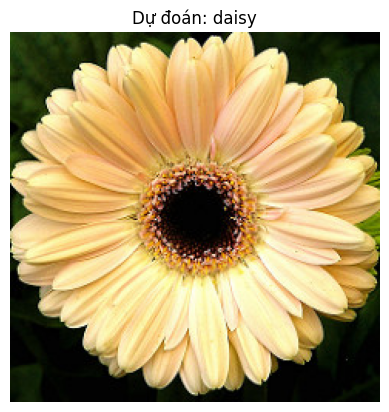

Kết quả dự đoán (softmax): [[0.4594063]]
Loài hoa dự đoán: daisy


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def predict_flower(image_path):
    # Đọc ảnh đầu vào và kiểm tra
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Không thể đọc ảnh. Vui lòng kiểm tra lại đường dẫn:", image_path)
        return

    # Resize + normalize
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype('float32') / 255.0
    img = img.reshape(1, img_size, img_size, 1)  # Shape phù hợp với model input

    # Dự đoán
    prediction = model.predict(img)
    predicted_index = np.argmax(prediction)
    predicted_label = le.inverse_transform([predicted_index])[0]

    # Hiển thị ảnh màu và kết quả
    img_color = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.imshow(img_color)
    plt.title(f"Dự đoán: {predicted_label}")
    plt.axis('off')
    plt.show()

    # In kết quả dự đoán chi tiết
    print("Kết quả dự đoán (softmax):", prediction)
    print("Loài hoa dự đoán:", predicted_label)

# Gọi hàm dự đoán (thay đường dẫn ảnh của bạn vào đây)
predict_flower('/content/sample_data/flower.jpg')
